In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 198.200269937714
Iteration 2, RMSE: 281.4263088767692
Iteration 3, RMSE: 160.19040653994387
Iteration 4, RMSE: 152.24070255098522
Iteration 5, RMSE: 154.834619656921
Iteration 6, RMSE: 95.84967617167517
Iteration 7, RMSE: 138.59868733302605
Iteration 8, RMSE: 139.38309592518385
Iteration 9, RMSE: 106.21029727922775
Iteration 10, RMSE: 109.73138136121722
Iteration 11, RMSE: 111.01961306782712
Iteration 12, RMSE: 95.82449805197244
Iteration 13, RMSE: 101.30169513566052
Iteration 14, RMSE: 105.12614275920352
Iteration 15, RMSE: 92.06299876874455
Iteration 16, RMSE: 108.51473810408447
Iteration 17, RMSE: 110.33206689819885
Iteration 18, RMSE: 98.49195451987967
Iteration 19, RMSE: 239.59609325886603
Iteration 20, RMSE: 237.15509795742344
Iteration 21, RMSE: 132.1471500716658
Iteration 22, RMSE: 131.259901083044
Iteration 23, RMSE: 136.79138099014114
Iteration 24, RMSE: 128.73207462605976
Iteration 25, RMSE: 132.26672179919447
Iteration 26, RMSE: 130.1296611820079
Iteratio

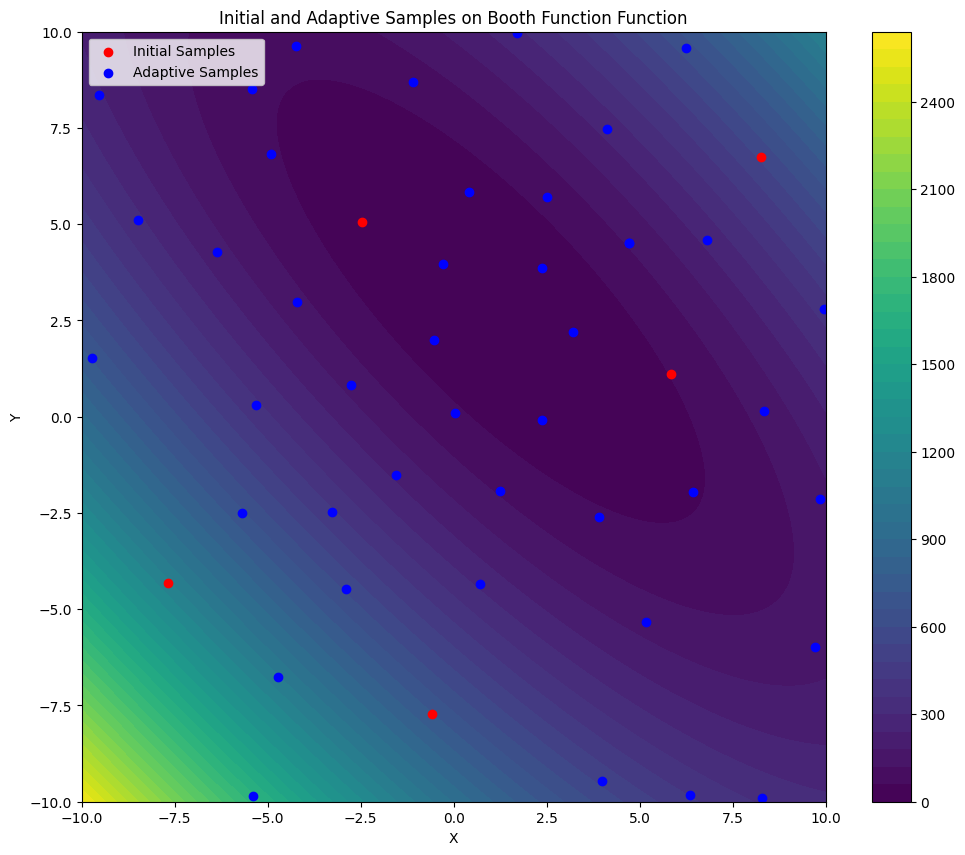

           X         Y
0  -0.579588 -7.713823
1   8.274218  6.734622
2  -2.457347  5.053938
3   5.848260  1.097103
4  -7.681956 -4.331564
5  -9.546579  8.354938
6  -9.712070  1.524079
7  -1.541377 -1.522996
8  -5.308582  0.310566
9   2.386766  3.857854
10 -5.695177 -2.492670
11  8.291564 -9.914706
12  1.713339  9.974270
13  5.178726 -5.344032
14  0.702322 -4.335994
15 -2.891855 -4.475758
16 -8.490539  5.113601
17  9.835277 -2.135187
18 -0.524462  1.992996
19  4.131899  7.475606
20  9.958763  2.787000
21  6.817350  4.594781
22 -4.228040  9.622374
23 -5.380528 -9.848826
24  3.988821 -9.466988
25  2.379917 -0.077788
26  9.725961 -5.970099
27  6.356983 -9.815255
28 -1.083651  8.693985
29 -4.901022  6.835604
30 -4.216501  2.988674
31  0.418653  5.845385
32  8.347087  0.137808
33 -2.766664  0.832000
34  6.435117 -1.965139
35 -5.426883  8.504540
36  3.905091 -2.597324
37  6.242182  9.575169
38 -0.277660  3.972858
39 -6.373997  4.278489
40  3.196847  2.211449
41  0.041555  0.101450
42  2.50840

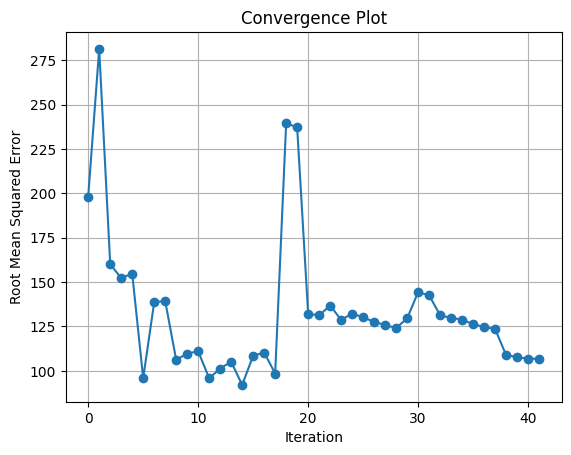

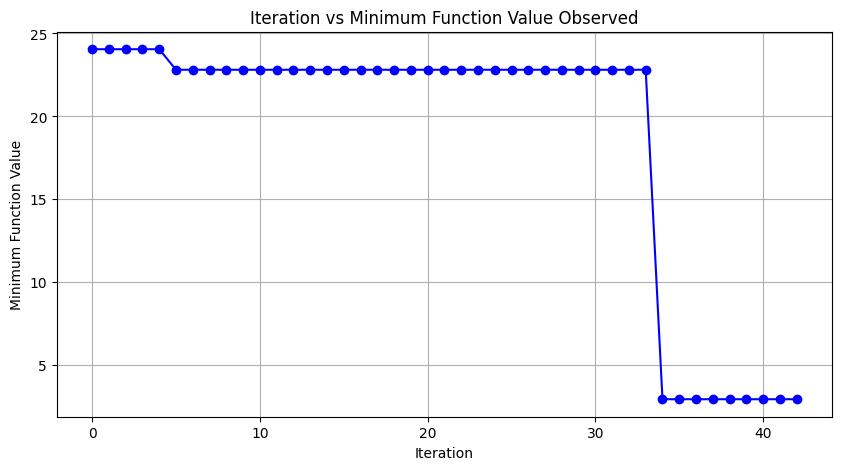

Best observed function value after active learning: 2.9504860446112304


In [2]:
range_param = ex_func.function_ranges["Booth"]
function_param = ex_func.booth

# Generate a mesh for the background function
input, output = samplers.Sampler.generate_mesh(range_param, num_points=100, function= function_param)

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(function_param)
initial_points = sampler.sample(num_samples=5, ranges = range_param)
initial_values = np.array([function_param(i) for i in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, range_param, 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_visuals(input, output, "Booth Function")
sampling_vis.plot_results()

In [5]:
functions = {
    "Ackley": ex_func.ackley,
    "Bukin": ex_func.bukin,
    "Cross-in-Tray": ex_func.cross_in_tray,
    "Drop-Wave": ex_func.drop_wave,
    "Eggholder": ex_func.eggholder,
    "Gramacy & Lee": ex_func.gramacy_lee,
    "Griewank": ex_func.griewank,
    "Holder Table": ex_func.holder_table,
    "Rastrigin": ex_func.rastrigin,
    "Schaffer Function N. 2": ex_func.schaffer2,
    "Schaffer Function N. 4": ex_func.schaffer4,
    "Schwefel": ex_func.schwefel,
    "Shubert": ex_func.shubert,

    
    "Booth": ex_func.booth,
    "Matyas": ex_func.matyas,
    "McCormick": ex_func.mccormick,
    "Zakharov": ex_func.zakharov,
    "Three-Hump Camel": ex_func.three_hump_camel,
    "Six-Hump Camel": ex_func.six_hump_camel,
    "Dixon-Price": ex_func.dixon_price,
    
    "De Jong Function N. 5": ex_func.de_jong5,
    "Easom": ex_func.easom,
    "Beale": ex_func.beale,
    "Branin": ex_func.branin,
    "Colville": ex_func.colville
}

for name, function_param in functions.items():
    print(f"Optimizing function: {name}")

    # Generate a mesh for the background function
    range_param = ex_func.function_ranges[name]
    X, Y, Z = samplers.Sampler.generate_mesh(range_param, num_points=100, function=function_param)

    # Generate initial samples
    sampler = samplers.LatinHypercubeSampling(function_param)
    initial_points = sampler.sample(num_samples=5, ranges=range_param)
    initial_values = np.array([function_param([x, y]) for x, y in initial_points])

    # Train the initial model using random forests
    rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
    rf_model.train_model(initial_points, initial_values)
    trained_rf_model = rf_model.get_model()

    # Perform active learning
    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
    min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, range_param, 3)

    # Plot the results
    sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values,
                                                  improvement)
    sampling_vis.plot_results(X, Y, Z, name)

Optimizing function: Ackley


ValueError: not enough values to unpack (expected 3, got 2)